In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
#load dataset as per needed
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#visualise the data
#import necessary library
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
#usnique number of classes
number_classes = np.unique(train_Y)

In [ ]:
number_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#total number of classes
len_classes = len(number_classes)

In [ ]:
len_classes

10

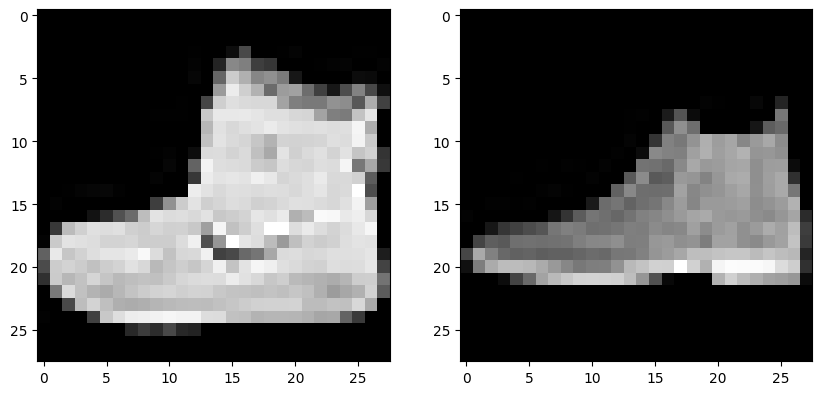

In [ ]:
#plotting the datasets
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap ="gray")

plt.subplot(122)
plt.imshow(test_X[0, :, :], cmap = "gray")


In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
train_X = train_X.reshape(-1,28,28,1)

In [ ]:
train_X.shape

(60000, 28, 28, 1)

In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
test_X = test_X.reshape(-1,28,28,1)
test_X.shape

(10000, 28, 28, 1)

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255
test_X = test_X /255

In [ ]:
train_Y[5]

2

In [ ]:
test_Y[5]

1

In [ ]:
#now convert to the label to encoder

onehot_train_Y = to_categorical(train_Y)
onehot_test_Y = to_categorical(test_Y)
onehot_test_Y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, onehot_train_Y, test_size=0.2, random_state=13)

In [ ]:
import keras
from keras.models import Sequential,Model
from tensorflow.keras import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [ ]:
batch_size = 64
epochs = 30
num_classes = 10

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.45))
model.add(Conv2D(512, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.45))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
train_dropout = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/30
750/750 [==============================] - 589s 784ms/step - loss: 0.7214 - accuracy: 0.7287 - val_loss: 0.3960 - val_accuracy: 0.8543
Epoch 2/30
750/750 [==============================] - 575s 767ms/step - loss: 0.4077 - accuracy: 0.8514 - val_loss: 0.3144 - val_accuracy: 0.8829
Epoch 3/30
750/750 [==============================] - 581s 775ms/step - loss: 0.3513 - accuracy: 0.8705 - val_loss: 0.2872 - val_accuracy: 0.8962
Epoch 4/30
750/750 [==============================] - 585s 780ms/step - loss: 0.3279 - accuracy: 0.8809 - val_loss: 0.2668 - val_accuracy: 0.9012
Epoch 5/30
750/750 [==============================] - 580s 773ms/step - loss: 0.3136 - accuracy: 0.8858 - val_loss: 0.2719 - val_accuracy: 0.8970
Epoch 6/30
750/750 [==============================] - 572s 762ms/step - loss: 0.2918 - accuracy: 0.8933 - val_loss: 0.2524 - val_accuracy: 0.9075
Epoch 7/30
750/750 [==============================] - 576s 768ms/step - loss: 0.2871 - accuracy: 0.8944 - val_loss: 0.2816 -

In [ ]:
test_eval = model.evaluate(test_X, onehot_test_Y, verbose=0)

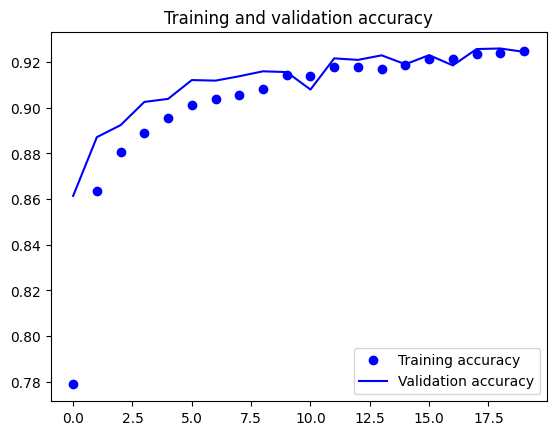

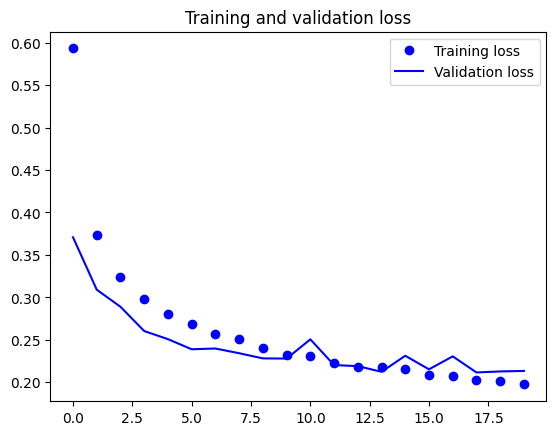

In [ ]:
accuracy = train_dropout.history['accuracy']
val_accuracy = train_dropout.history['val_accuracy']
loss = train_dropout.history['loss']
val_loss = train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()